In [30]:
import torch
from torch import nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader 
import torch.optim as optim
from model import network # 导入模型文件中的网络模型类
import matplotlib.pyplot as plt

# 配置参数
batch_size = 64  # 每个批次的样本数量
epoch_num = 1  # 训练的总epoch数
learning_rate = 0.0025  # 学习率
num_print = 10  # 每训练多少批次输出一次信息
weight_decay = 0.001  # 衰减权重

root = '../path'  # 数据集存放的根目录

# 创建MNIST数据集
train_dataset = datasets.MNIST(root, train=True, transform=transforms.ToTensor(), download=True)

# 创建数据加载器
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, num_workers=0, drop_last=False)

# 检测是否有可用的GPU，如果有就使用它
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
a = []
a_label = []
# 定义一个函数来进行训练
def run_train(loss_fc, loss_fc_name):
    model = network()  # 否则使用普通的网络模型
    model.to(device)  # 将模型移动到GPU（如果可用）

    optimizer = optim.Adam(model.parameters(), lr=learning_rate) 

    model.train()  # 将模型设置为训练模式
    for epoch in range(epoch_num):
        running_loss = 0.0
        for i, data in enumerate(train_loader, start=1):
            optimizer.zero_grad()  # 梯度清零
            images, labels = data
            images = torch.flatten(images, start_dim=-2)  # 将图像扁平化
            images = images.to(device)  # 将数据移动到GPU
            labels = labels.to(device)  # 将标签移动到GPU

            predict = model(images).squeeze()  # 前向传播，获取模型预测结果

            l1_loss = torch.tensor(0., requires_grad=True)
            for param in model.parameters():
                l1_loss = l1_loss + torch.norm(param, 1)
            if (loss_fc_name == "MSELoss"):
                target = nn.functional.one_hot(labels, 10)
                target = target.float()
                loss = loss_fc(predict, target)  # 计算损失
            else:
                loss = loss_fc(predict, labels) # 计算损失
            loss.backward()  # 反向传播
            optimizer.step()  # 更新模型参数

            running_loss += loss.item()
            
            if i % num_print == 0:
                a.append(i)
                a_label.append(running_loss / num_print)
                running_loss = 0.0

    # 保存训练好的模型
    torch.save(model, f'./models/{loss_fc_name}_model1.pth')


loss_fc = nn.CrossEntropyLoss()
run_train(loss_fc, "CrossEntropyLoss")

# loss_fc = nn.MSELoss()
# run_train(loss_fc, "MSELoss")


In [35]:
import torch
from torch import nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader 
import torch.optim as optim
from model import network # 导入模型文件中的网络模型类
import matplotlib.pyplot as plt

# 配置参数
batch_size = 64  # 每个批次的样本数量
epoch_num = 1  # 训练的总epoch数
learning_rate = 0.0025  # 学习率
num_print = 10  # 每训练多少批次输出一次信息
weight_decay = 0.001  # 衰减权重

root = '../path'  # 数据集存放的根目录

# 创建MNIST数据集
train_dataset = datasets.MNIST(root, train=True, transform=transforms.ToTensor(), download=True)

# 创建数据加载器
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, num_workers=0, drop_last=False)

# 检测是否有可用的GPU，如果有就使用它
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
b = []
b_label = []
# 定义一个函数来进行训练
def run_train(loss_fc, loss_fc_name):
    model = network()  # 否则使用普通的网络模型
    model.to(device)  # 将模型移动到GPU（如果可用）

    optimizer = optim.Adam(model.parameters(), lr=learning_rate) 

    model.train()  # 将模型设置为训练模式
    for epoch in range(epoch_num):
        running_loss = 0.0
        for i, data in enumerate(train_loader, start=1):
            optimizer.zero_grad()  # 梯度清零
            images, labels = data
            images = torch.flatten(images, start_dim=-2)  # 将图像扁平化
            images = images.to(device)  # 将数据移动到GPU
            labels = labels.to(device)  # 将标签移动到GPU

            predict = model(images).squeeze()  # 前向传播，获取模型预测结果

            l1_loss = torch.tensor(0., requires_grad=True)
            for param in model.parameters():
                l1_loss = l1_loss + torch.norm(param, 1)
            if (loss_fc_name == "MSELoss"):
                target = nn.functional.one_hot(labels, 10)
                target = target.float()
                loss = loss_fc(predict, target)  # 计算损失
            else:
                loss = loss_fc(predict, labels) + weight_decay * l1_loss # 计算损失
            loss.backward()  # 反向传播
            optimizer.step()  # 更新模型参数

            running_loss += loss.item()
            
            if i % num_print == 0:
                b.append(i)
                b_label.append(running_loss / num_print)
                running_loss = 0.0

    # 保存训练好的模型
    torch.save(model, f'./models/{loss_fc_name}_model2.pth')


loss_fc = nn.CrossEntropyLoss()
run_train(loss_fc, "CrossEntropyLoss")

# loss_fc = nn.MSELoss()
# run_train(loss_fc, "MSELoss")


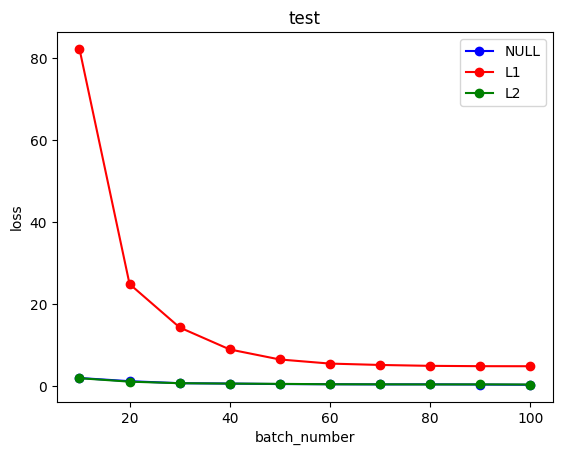

In [32]:
import torch
from torch import nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader 
import torch.optim as optim
from model import network # 导入模型文件中的网络模型类
import matplotlib.pyplot as plt

# 配置参数
batch_size = 64  # 每个批次的样本数量
epoch_num = 1  # 训练的总epoch数
learning_rate = 0.0025  # 学习率
num_print = 10  # 每训练多少批次输出一次信息
weight_decay = 0.001  # 衰减权重

root = '../path'  # 数据集存放的根目录

# 创建MNIST数据集
train_dataset = datasets.MNIST(root, train=True, transform=transforms.ToTensor(), download=True)

# 创建数据加载器
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, num_workers=0, drop_last=False)

# 检测是否有可用的GPU，如果有就使用它
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
c = []
c_label = []
# 定义一个函数来进行训练
def run_train(loss_fc, loss_fc_name):
    model = network()  # 否则使用普通的网络模型
    model.to(device)  # 将模型移动到GPU（如果可用）

    optimizer = optim.Adam(model.parameters(), lr=learning_rate) 

    model.train()  # 将模型设置为训练模式
    for epoch in range(epoch_num):
        running_loss = 0.0
        for i, data in enumerate(train_loader, start=1):
            optimizer.zero_grad()  # 梯度清零
            images, labels = data
            images = torch.flatten(images, start_dim=-2)  # 将图像扁平化
            images = images.to(device)  # 将数据移动到GPU
            labels = labels.to(device)  # 将标签移动到GPU

            predict = model(images).squeeze()  # 前向传播，获取模型预测结果

            l1_loss = torch.tensor(0., requires_grad=True)
            for param in model.parameters():
                l1_loss = l1_loss + torch.norm(param, 1)
            if (loss_fc_name == "MSELoss"):
                target = nn.functional.one_hot(labels, 10)
                target = target.float()
                loss = loss_fc(predict, target, weight_decay=weight_decay)  # 计算损失
            else:
                loss = loss_fc(predict, labels)# 计算损失
            loss.backward()  # 反向传播
            optimizer.step()  # 更新模型参数

            running_loss += loss.item()
            
            if i % num_print == 0:
                c.append(i)
                c_label.append(running_loss / num_print)
                running_loss = 0.0

    # 保存训练好的模型
    torch.save(model, f'./models/{loss_fc_name}_model3.pth')
    
loss_fc = nn.CrossEntropyLoss()
run_train(loss_fc, "CrossEntropyLoss")

plt.plot(a[:10], a_label[:10], marker='o', linestyle='-', color='blue', label='NULL')
plt.plot(b[:10], b_label[:10], marker='o', linestyle='-', color='red', label='L1')
plt.plot(c[:10], c_label[:10], marker='o', linestyle='-', color='green', label='L2')

plt.legend()
plt.xlabel('batch_number')
plt.ylabel('loss')
plt.title('test')
plt.show()
# loss_fc = nn.MSELoss()
# run_train(loss_fc, "MSELoss")

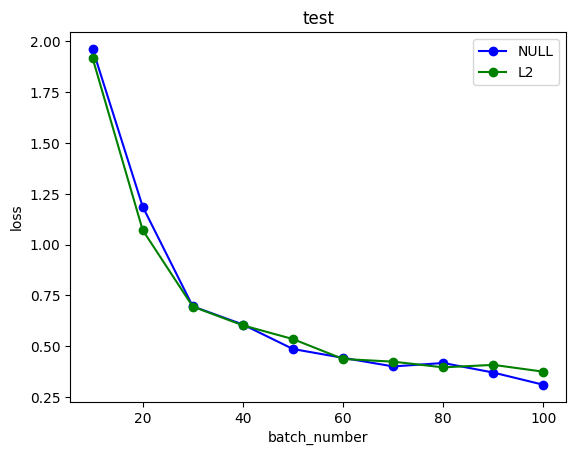

In [34]:
plt.plot(a[:10], a_label[:10], marker='o', linestyle='-', color='blue', label='NULL')
plt.plot(c[:10], c_label[:10], marker='o', linestyle='-', color='green', label='L2')
plt.legend()
plt.xlabel('batch_number')
plt.ylabel('loss')
plt.title('test')
plt.show()